# Multiple Linear Regression
Multiple linear regression is a statistical technique used to predict the outcome of a response variable 
through several explanatory variables and model the relationships between them.

- Equation for Multiple Linear Regression : $ Y = \sum_{i=1}^{N}(m_i * x_i) +  c $
- where $N$ is number of independent variable
- $m$ is slope
- $ x $ is independent variable
- $ c $ is coefficient

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../SDataset/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.isna().any().sum()

0

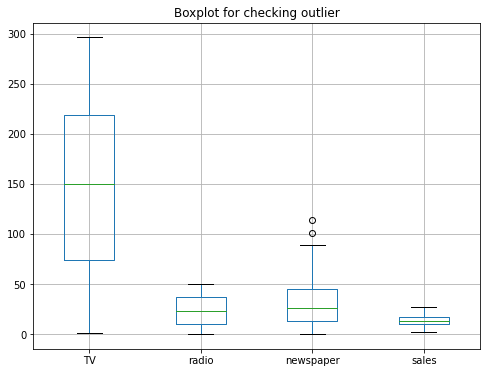

In [6]:
plt.figure(figsize = (8, 6))
plt.title('Boxplot for checking outlier')
df.boxplot();

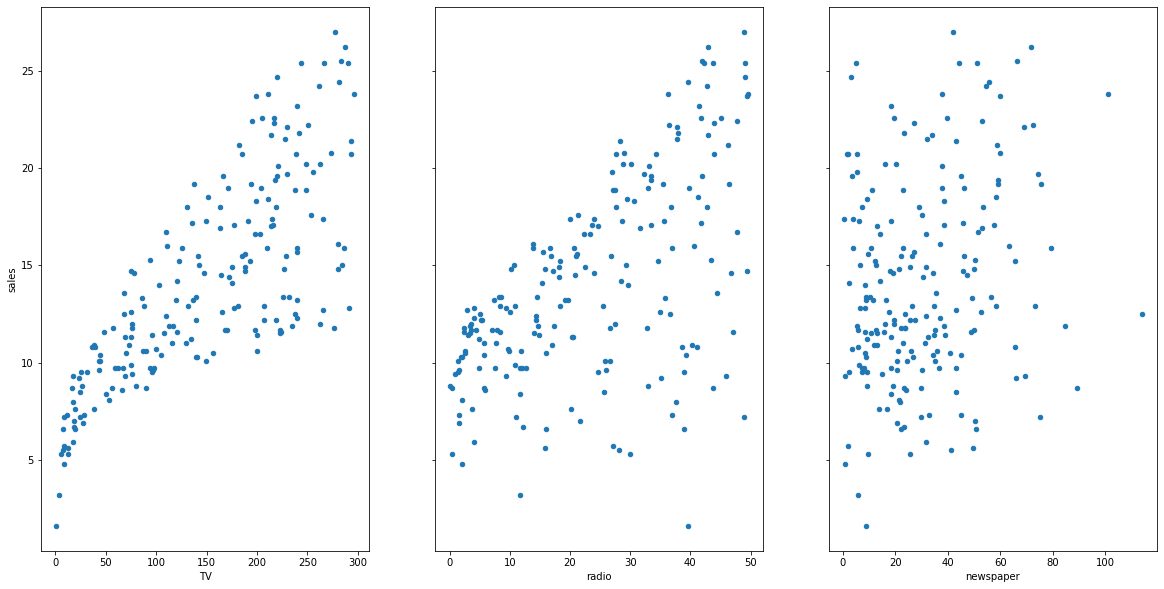

In [7]:
_, axs = plt.subplots(1, 3, sharey = True)
index = 0
for col in df:
    if(col == 'sales'): break;
    df.plot(kind = 'scatter', x = str(col), y  = 'sales', ax = axs[index], figsize = (20, 10))
    index = index+1

<AxesSubplot:>

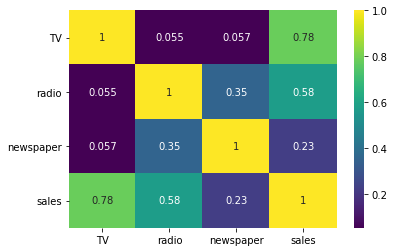

In [8]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['TV','radio', 'newspaper']],  df.sales, test_size = 0.25, random_state = 42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((150, 3), (150,), (50, 3), (50,))

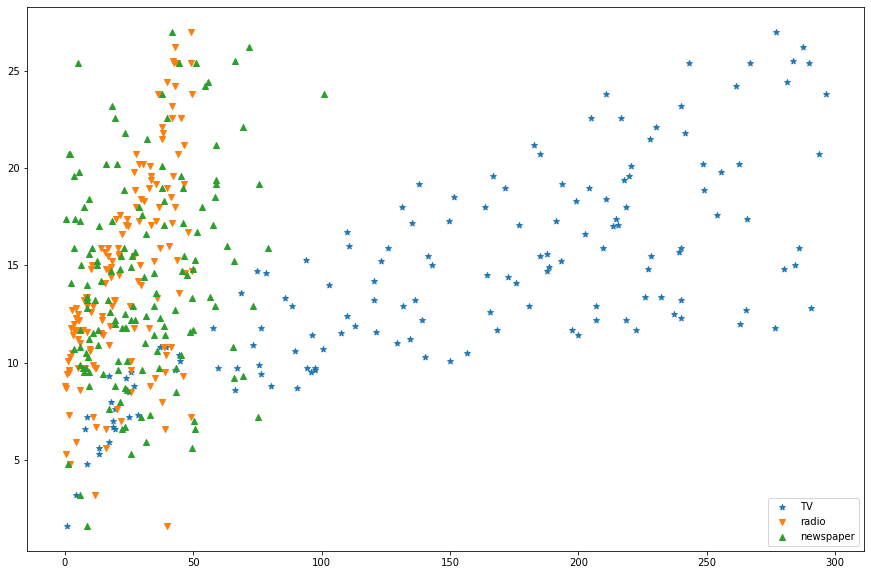

In [14]:
plt.figure(figsize = (15, 10))
plt.scatter(x = X_train[['TV']], y = Y_train, marker = '*')
plt.scatter(x = X_train[['radio']], y = Y_train, marker = 'v')
plt.scatter(x = X_train[['newspaper']], y = Y_train, marker = '^')
plt.legend(['TV', 'radio', 'newspaper'], loc = 'lower right')
plt.show()

In [15]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'sales ~ TV', data = df).fit()

In [17]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [19]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [21]:
lm.rsquared

0.611875050850071

In [26]:
lm = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = df).fit()
lm.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


In [27]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        16:09:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""